# 10. Basic Regression Analysis with Time Series Data

## 10.1. Static Time Series Models

### Example 10.2 Effects of Inflation and Deficits on Interest Rates

In [1]:
from supplementaryFunctions import *
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime

In [2]:
intdef = woo.dataWoo("intdef")
intdef.head()

,year,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
0,1948,1.04,8.1,16.200001,11.6,-4.600000,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1949,1.10,-1.2,14.500000,14.3,-0.200000,1.04,8.1,-4.600000,0.06,-9.3,4.400001,0
2,1950,1.22,1.3,14.400000,15.6,1.200001,1.10,-1.2,-0.200000,0.12,2.5,1.400001,0
3,1951,1.55,7.9,16.100000,14.2,-1.900001,1.22,1.3,1.200001,0.33,6.6,-3.100001,0
4,1952,1.77,1.9,19.000000,19.4,0.400000,1.55,7.9,-1.900001,0.22,-6.0,2.300000,0


#### The keys "inf" and "def" correspond with keywords. Without addressing this problem, the formula will misinterpret the command

In [3]:
# linear regression of static model (Q functions avoids conflicts with keywords)
formula = "i3 ~ Q('inf') + Q('def')"
reg = smf.ols(formula = formula,
             data = intdef)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.6021$$,,,,
Intercept,1.7333,4.0125,0.0002,0.4320
Q('inf'),0.6059,7.3765,0.0000,0.0821
Q('def'),0.5131,4.3338,0.0001,0.1184


#### Let's check visually if the errors independent of the explanatory variables:

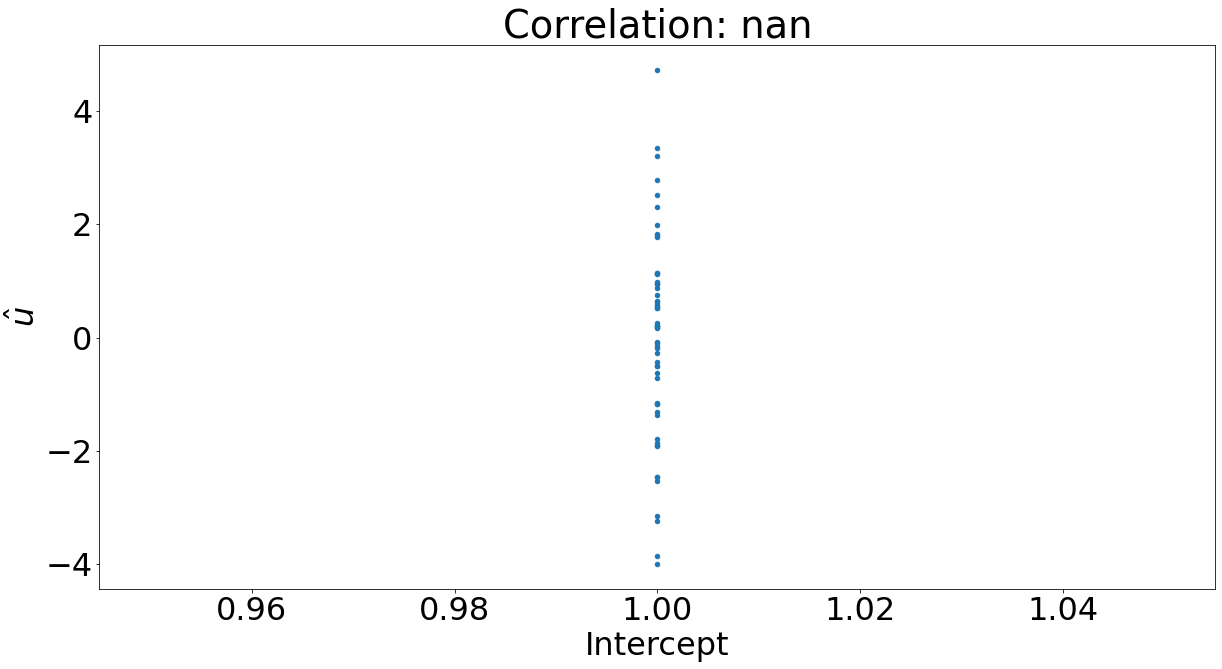

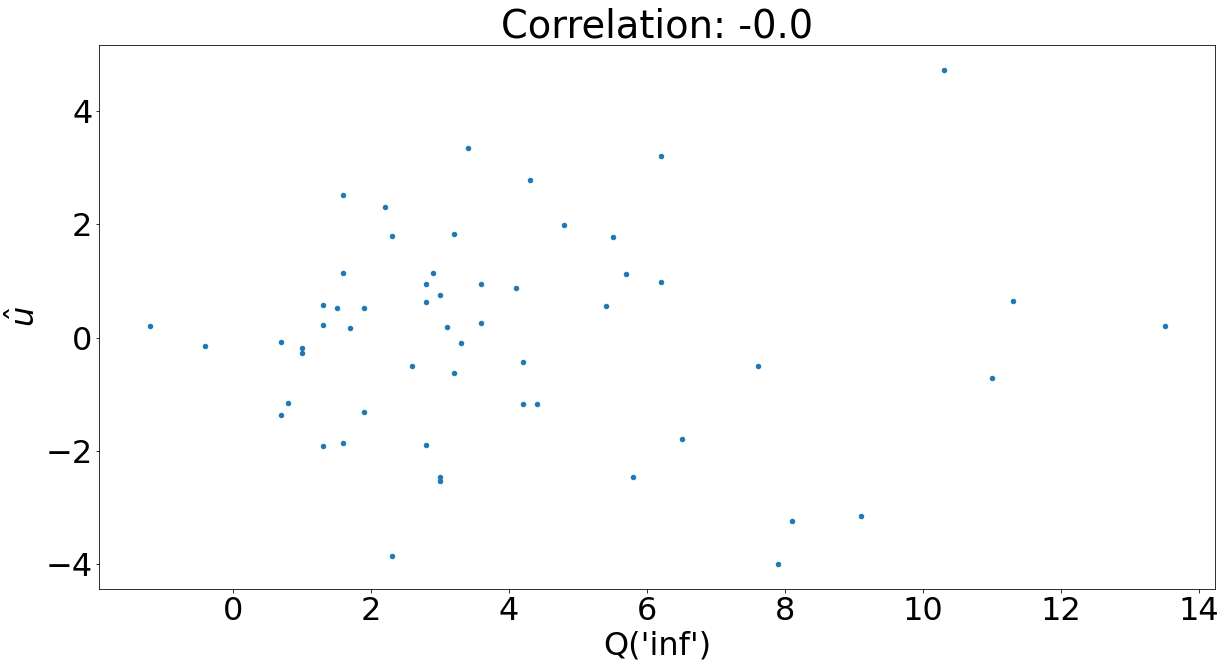

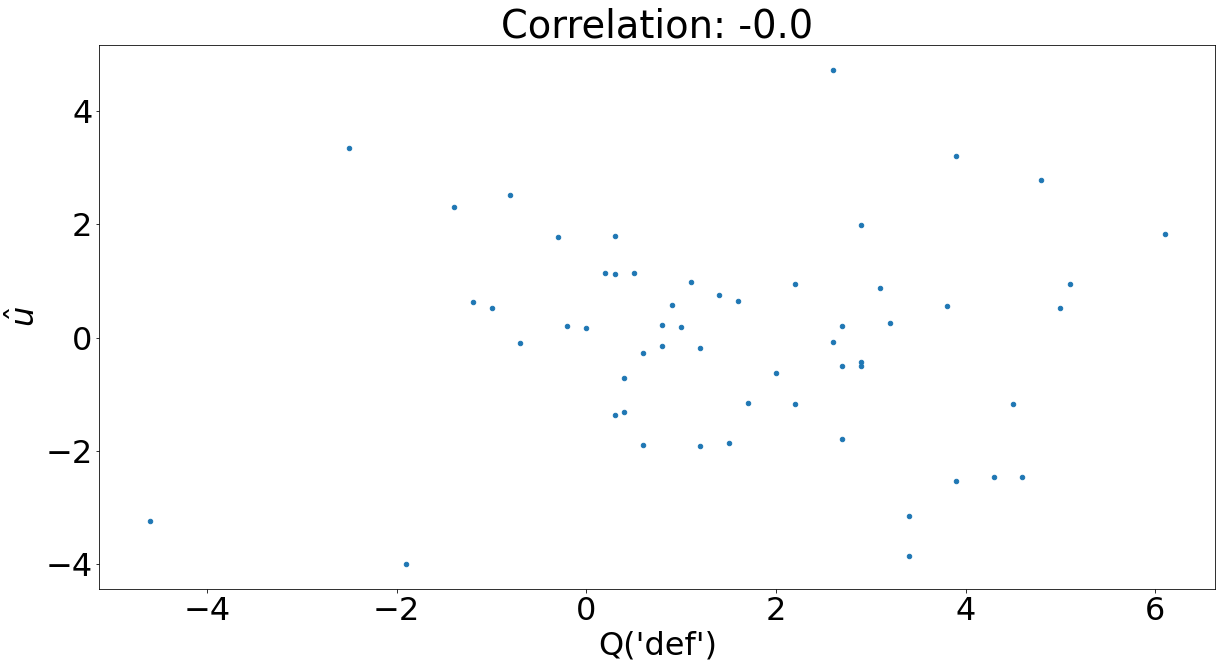

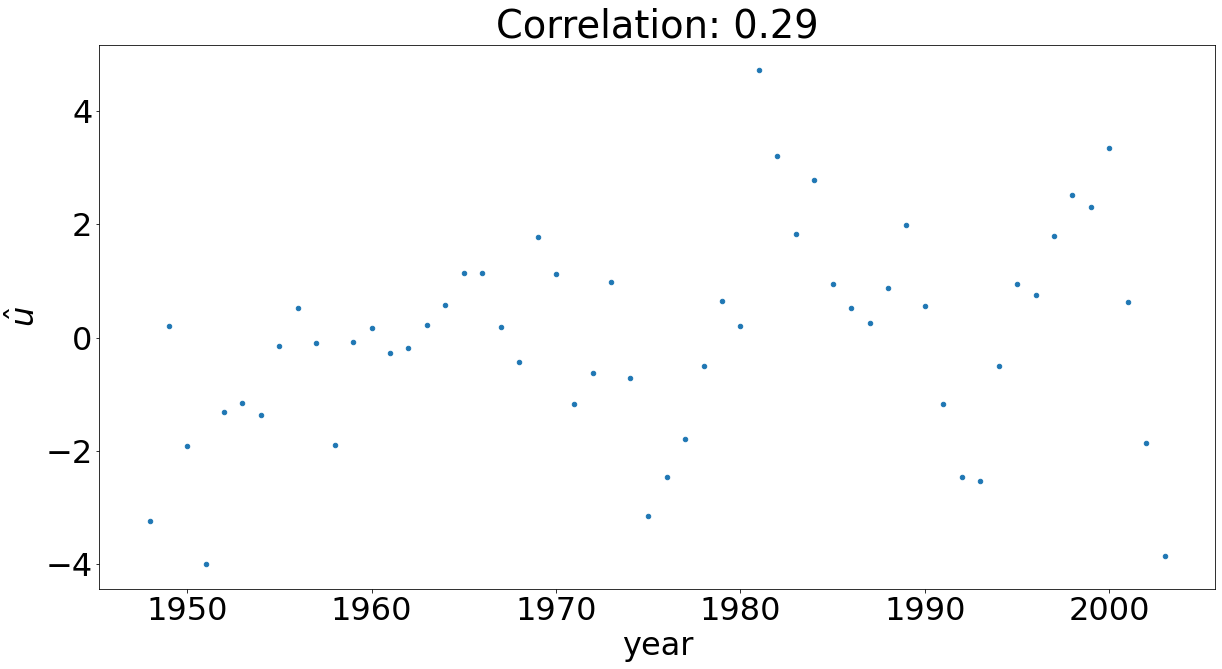

In [4]:
plt.rcParams.update({"font.size":32})
data = regression_df(reg)
data["year"] =intdef["year"]
# add time variable
build_estimator(data, results, list(data.keys())[0])
plot_errors(data)

We can see clearly that the error term is biased across time, both in the short-run and in the long-run. We can run the same regression again while including the time variable.

In [5]:
# linear regression of static model (Q functions avoids conflicts with keywords)
formula = "i3 ~ Q('inf') + Q('def') + year"
reg = smf.ols(formula = formula,
             data = intdef)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.6412$$,,,,
Intercept,-72.6702,-2.3271,0.0239,31.2274
Q('inf'),0.5873,7.4234,0.0000,0.0791
Q('def'),0.4051,3.3153,0.0017,0.1222
year,0.0378,2.3828,0.0209,0.0159


The estimates for our explanatory variables were modestly effected (the intercept shift in particular was impacted by the linear year term). the statistical significance of our explanatory variables is maintained. 

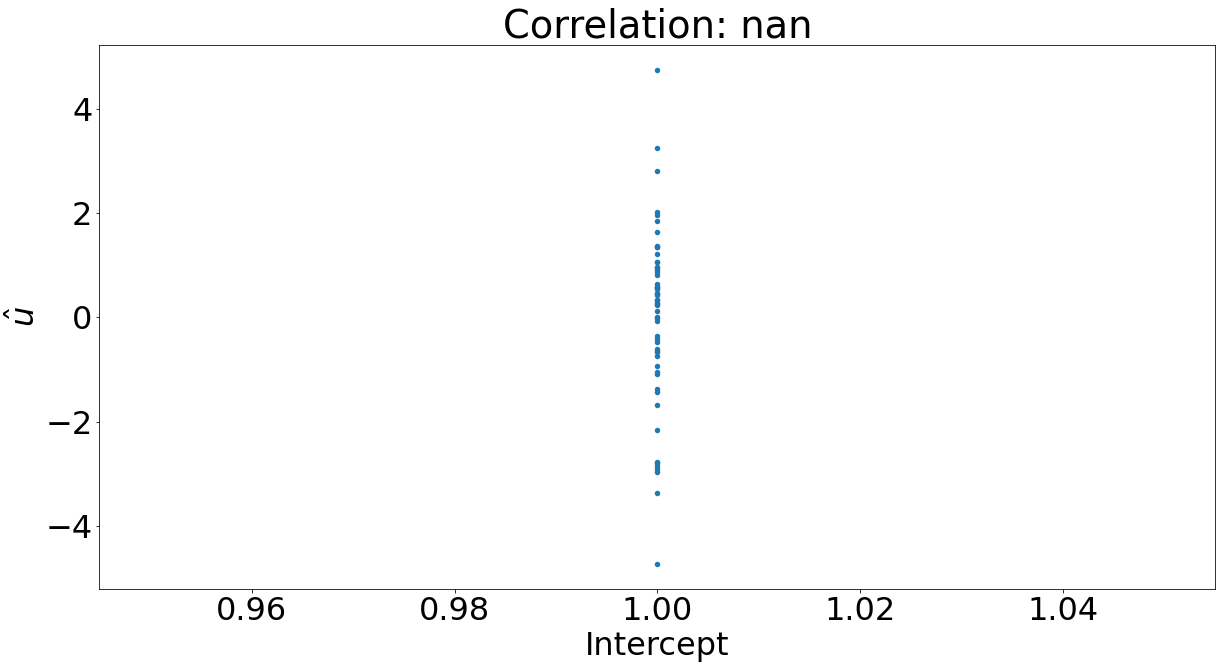

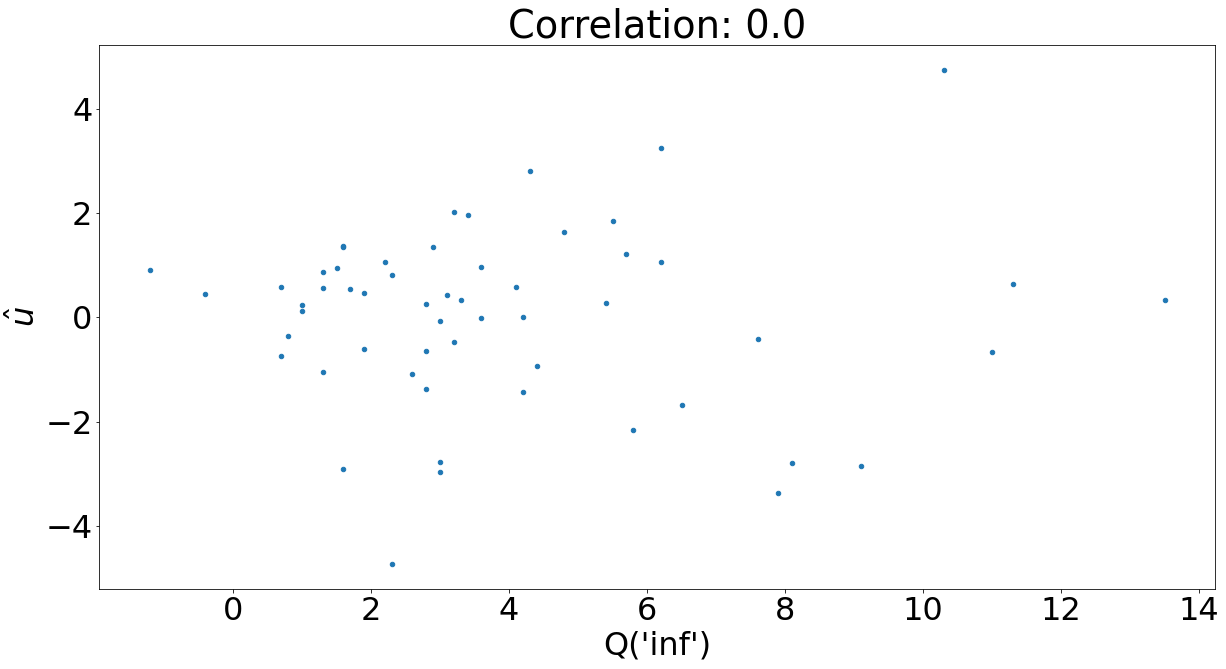

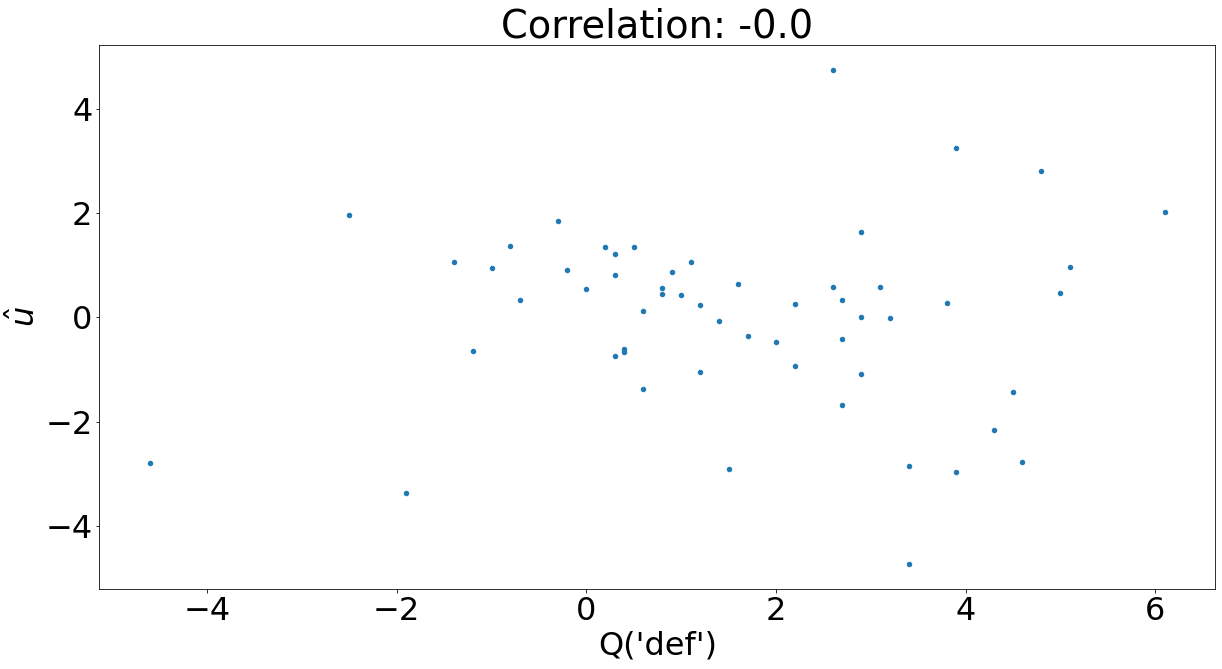

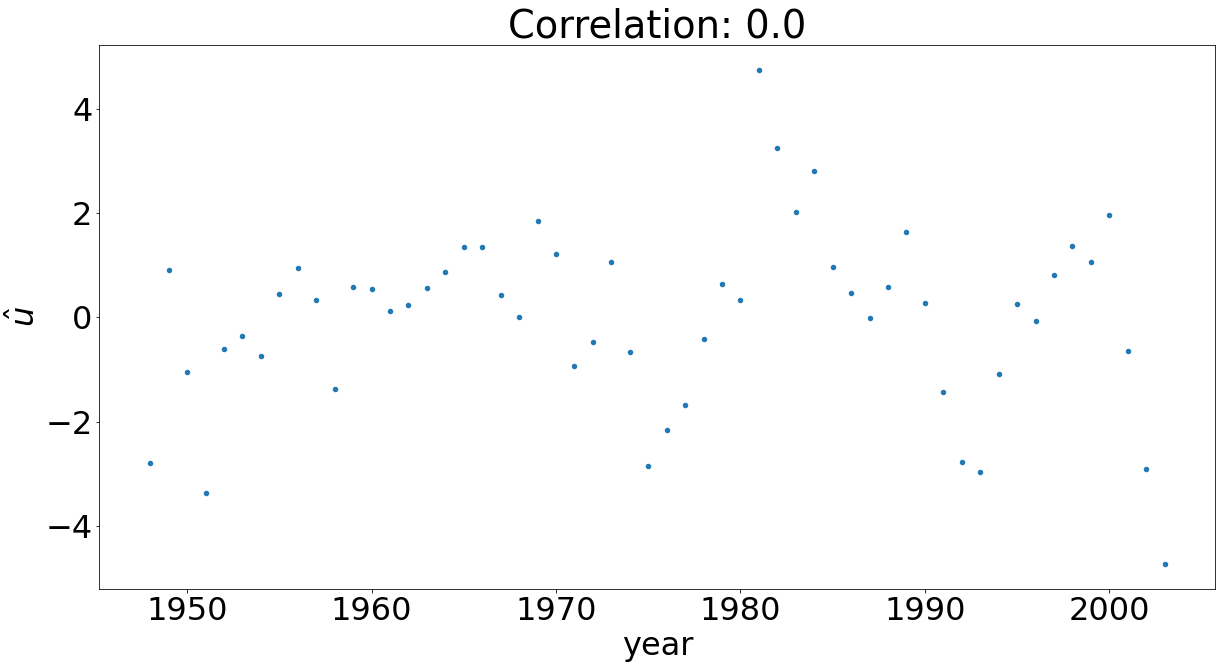

In [6]:
# add time variable
build_estimator(data, results, list(data.keys())[0])
plot_errors(data)

Notice that the upward bias across time is gone. This is because the correlation of the error term and explanatory variables must, by definition, be zero. There is still short-run autocorrelation in the error term. 

## 10.2. Time Series Data Types in _Python_

### 10.2.1. Equispaced Time Series

Not all time series data uses equally spaced dates. While this may or may not be a problem for analysis, it is important to be aware of the nature of data used in analysis. We will compare data that is equispaced and data that is not.

In [7]:
barium = woo.dataWoo("barium")
periods = len(barium)
barium.head()

,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
0,220.462006,9578.375977,0,0,0,0,0,0,100.099998,7.830000e+09,...,0,0,0,0,0,0,0,0,0,2.301664
1,94.797997,11219.480469,0,0,0,0,0,0,100.900002,8.820000e+09,...,0,0,0,0,0,0,0,0,0,0.844941
2,219.357498,9719.900391,0,0,0,0,0,0,101.099998,8.450000e+09,...,1,0,0,0,0,0,0,0,0,2.256788
3,317.421509,12920.950195,0,0,0,0,0,0,102.500000,9.240001e+09,...,0,1,0,0,0,0,0,0,0,2.456642
4,114.639000,9790.446289,0,0,0,0,0,0,104.099998,9.150000e+09,...,0,0,1,0,0,0,0,0,0,1.170927


In [8]:
# monthly time series starting Feb. 1978
barium.index = pd.date_range(start = "1978-02", periods = periods, freq = "M")
barium.head()

,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
1978-02-28,220.462006,9578.375977,0,0,0,0,0,0,100.099998,7.830000e+09,...,0,0,0,0,0,0,0,0,0,2.301664
1978-03-31,94.797997,11219.480469,0,0,0,0,0,0,100.900002,8.820000e+09,...,0,0,0,0,0,0,0,0,0,0.844941
1978-04-30,219.357498,9719.900391,0,0,0,0,0,0,101.099998,8.450000e+09,...,1,0,0,0,0,0,0,0,0,2.256788
1978-05-31,317.421509,12920.950195,0,0,0,0,0,0,102.500000,9.240001e+09,...,0,1,0,0,0,0,0,0,0,2.456642
1978-06-30,114.639000,9790.446289,0,0,0,0,0,0,104.099998,9.150000e+09,...,0,0,1,0,0,0,0,0,0,1.170927


Text(0.5, 1.0, 'chnimp')

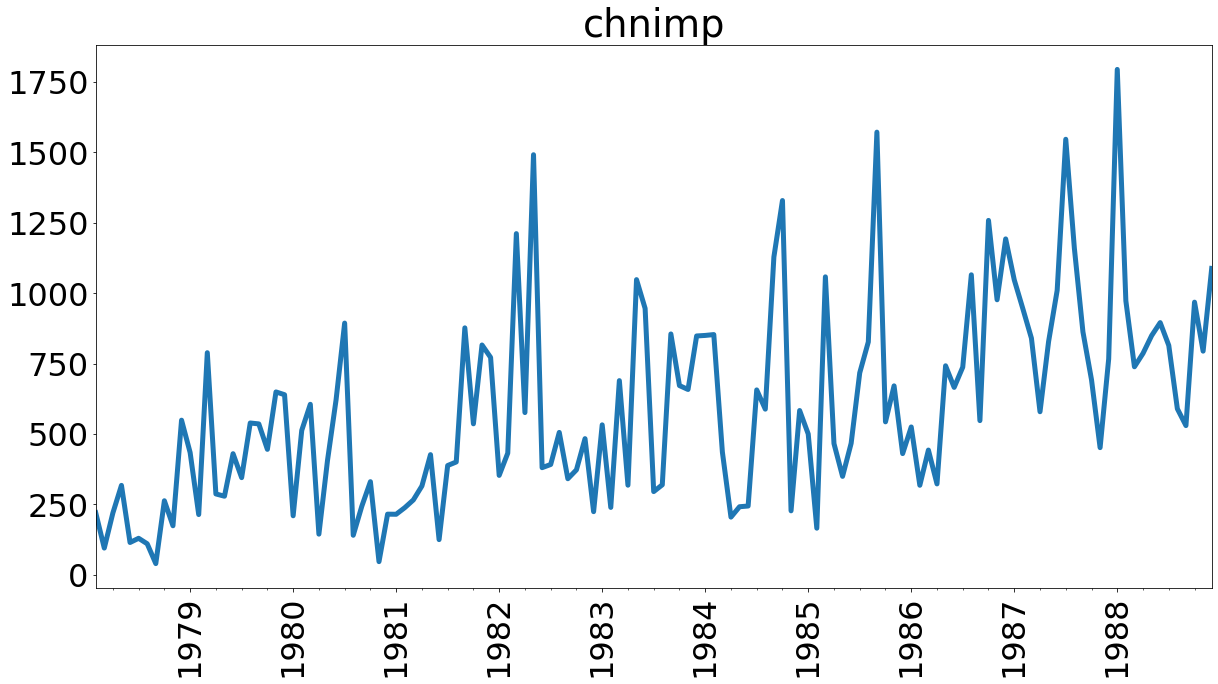

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
barium["chnimp"].plot.line(linewidth = 5, ax = ax)
plt.xticks(rotation=90)
plt.title("chnimp")

In [10]:
tickers = ["F"]
start_date = datetime.datetime(2014,1,1)
end_date = datetime.datetime(2015,12,31)
data = pdr.data.DataReader(tickers, "yahoo", start_date, end_date)
data

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,F,F,F,F,F,F
Date,,,,,,
2014-01-02,10.762959,15.44,15.45,15.28,15.42,31528500.0
2014-01-03,10.811755,15.51,15.64,15.30,15.52,46122300.0
2014-01-06,10.860552,15.58,15.76,15.52,15.72,42657600.0
2014-01-07,10.721134,15.38,15.74,15.35,15.73,54476300.0
2014-01-08,10.832667,15.54,15.71,15.51,15.60,48448300.0
...,...,...,...,...,...,...
2015-12-24,10.715696,14.31,14.37,14.25,14.35,9000100.0
2015-12-28,10.618350,14.18,14.34,14.16,14.28,13697500.0


Text(0, 0.5, 'Ford Close Price')

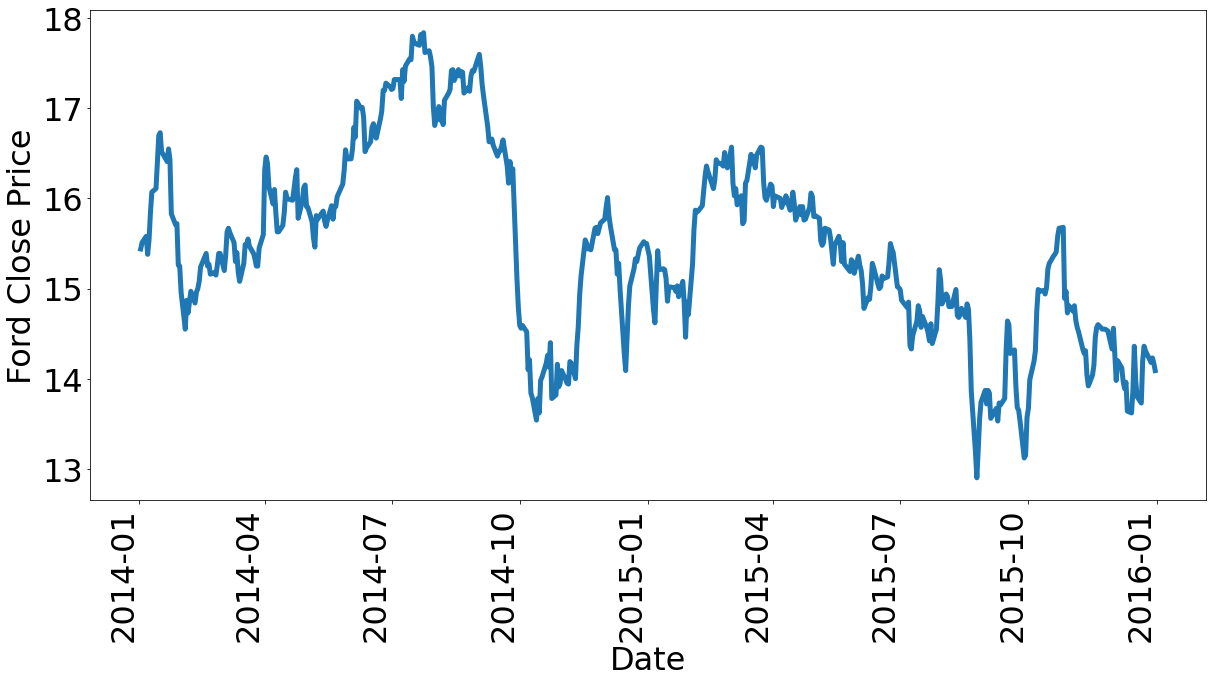

In [11]:
fig, ax = plt.subplots(figsize = (20,10))
data["Close"].plot.line(linewidth = 5, ax = ax, legend = False)
plt.xticks(rotation=90)
ax.set_ylabel("Ford Close Price")

# 10.3. Other Time Series Models

## 10.3.1. Finite Distributed Lags

### Example 10.4: Effects of Personal Exemption on Fertility Rates

In [12]:
fertil3 = woo.dataWoo("fertil3")
fertil3.head()

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
0,124.699997,0.00,1913,1,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126.599998,0.00,1914,2,4,0.0,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,124.699997,NaN,NaN,NaN,NaN,NaN
2,125.000000,0.00,1915,3,9,0.0,0.0,NaN,NaN,0,...,0.0,NaN,NaN,NaN,126.599998,1.900002,NaN,NaN,NaN,124.699997
3,123.400002,0.00,1916,4,16,0.0,0.0,0.0,NaN,0,...,0.0,0.0,NaN,NaN,125.000000,-1.599998,1.900002,NaN,NaN,126.599998
4,121.000000,19.27,1917,5,25,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,NaN,123.400002,-1.599998,-1.599998,1.900002,NaN,125.000000


In [13]:
lags = 2
for lag in range(1, lags + 1):
    fertil3["pe_lag" + str(lag)] = fertil3["pe"].shift(lag)
formula = "gfr ~ pe + pe_lag1 + pe_lag2 + ww2 + pill"
reg = smf.ols(formula = formula,
             data = fertil3)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.4986$$,,,,
Intercept,95.8705,29.2114,0.0000,3.2820
pe,0.0727,0.5789,0.5647,0.1255
pe_lag1,-0.0058,-0.0371,0.9705,0.1557
pe_lag2,0.0338,0.2679,0.7896,0.1263
ww2,-22.1265,-2.0617,0.0433,10.7320
pill,-31.3050,-7.8625,0.0000,3.9816


In [14]:
hypotheses = {}
hypotheses[1] = ["pe = 0", "pe_lag1 = 0", "pe_lag2 = 0"]
hypotheses[2] =  ["pe + pe_lag1 + pe_lag2 = 0"]
ftests = {}
ftest_results = {}
for i, hypothesis in hypotheses.items():
    key = str(hypothesis).replace("[","").replace("]", "").replace(",","").replace("'","")
    ftest_results[key] = {}
    ftests[key] = results.f_test(hypothesis)
    ftest_results[key]["f-stat"] = ftests[key].statistic
    ftest_results[key]["p-value"] = ftests[key].pvalue
pd.DataFrame(ftest_results).round(3) 

,pe = 0 pe_lag1 = 0 pe_lag2 = 0,pe + pe_lag1 + pe_lag2 = 0
f-stat,3.973,11.421
p-value,0.012,0.001


#### The null hypothesis of the second test consider whether the long-run propensity (LRP) of the pe variable is equal to 0. Let's cacluate thate LRP.

In [15]:
LRP_pe = results.params[["pe", "pe_lag1", "pe_lag2"]].sum()
LRP_pe

0.10071909027975401

### 10.3.2. Trends
### Example 10.7: Housing Investment and Prices

np.log(invpc)


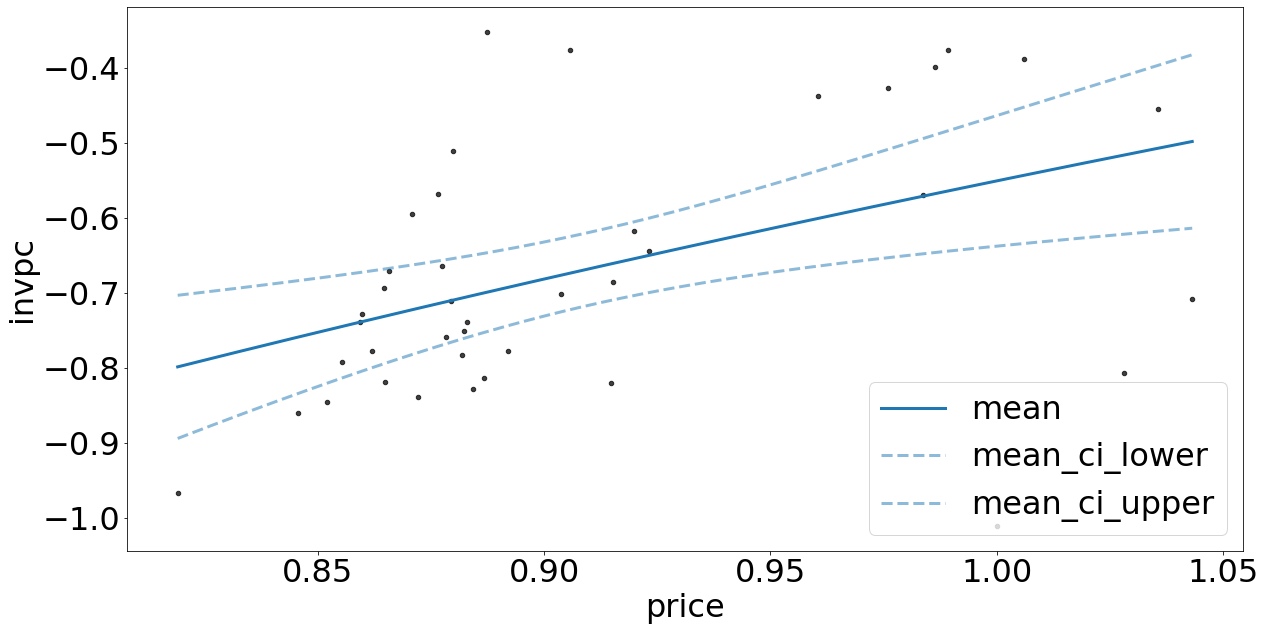

In [16]:
hseinv = woo.dataWoo("hseinv")
formula = "np.log(invpc) ~ np.log(price)"
reg_no_trend = smf.ols(formula = formula,
                 data = hseinv)
results_no_trend = reg_no_trend.fit()

formula = formula + " + t"
reg_trend = smf.ols(formula = formula,
                 data = hseinv)
results_trend = reg_trend.fit()

OLS_summary(results_no_trend)
build_smooth_multiple_regression_estimator(reg_no_trend, hseinv)

np.log(invpc)
np.log(invpc)


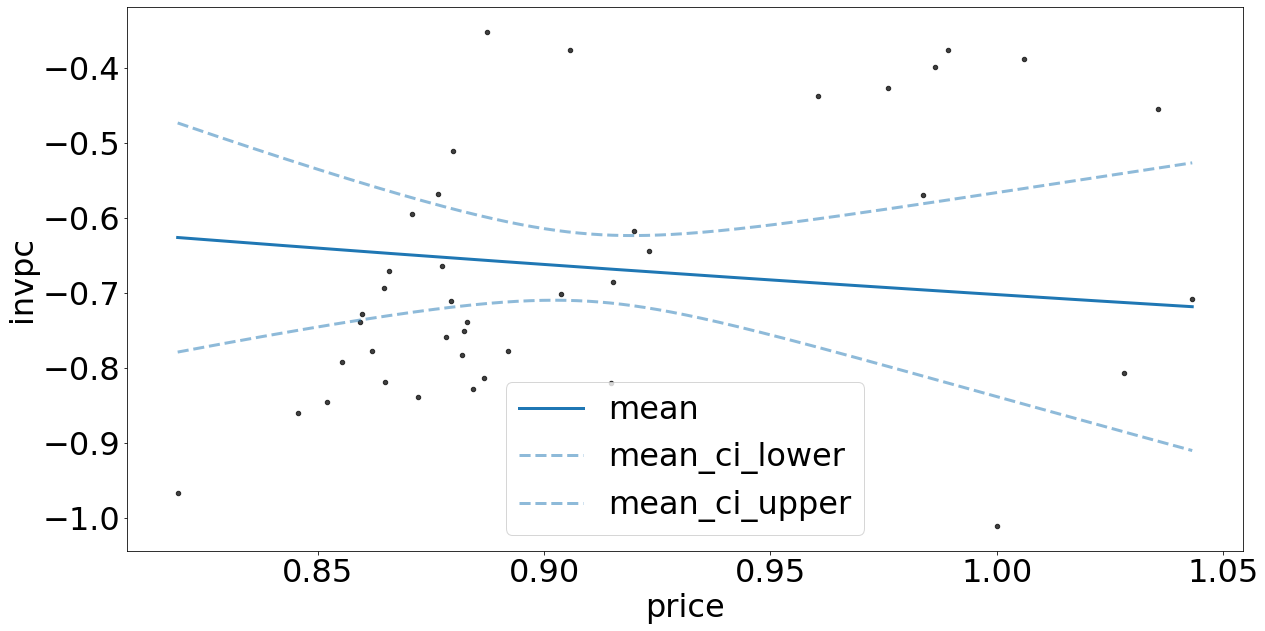

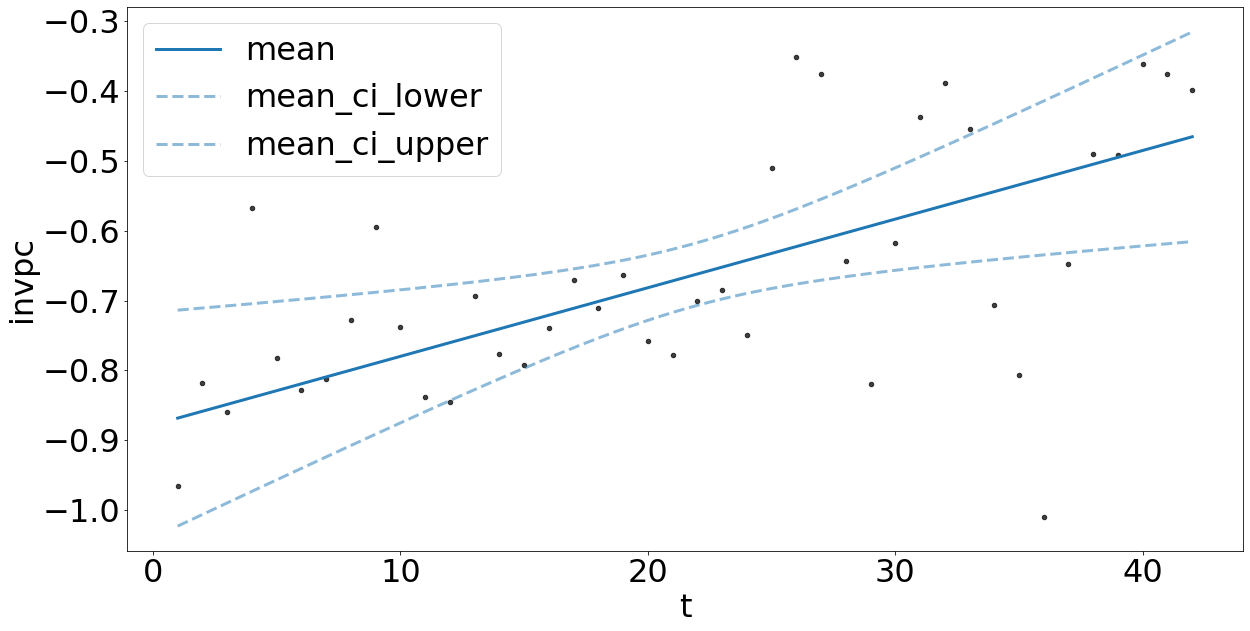

In [17]:
OLS_summary(results_trend)
build_smooth_multiple_regression_estimator(reg_trend, hseinv)

### 10.3.3. Seasonality

In [26]:
formula = "np.log(chnimp) ~ np.log(chempi) + np.log(gas) + np.log(rtwex) + befile6 + affile6 + afdec6"
months = list(barium.keys())[-12:-1]
for month in months:
    formula = formula + " + " + month
reg = smf.ols(formula = formula,
    data = barium)
results = reg.fit()
OLS_summary(results)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.3583$$,,,,
Intercept,16.7792,0.5174,0.6059,32.4286
np.log(chempi),3.2651,6.6238,0.0000,0.4929
np.log(gas),-1.2781,-0.9202,0.3594,1.3890
np.log(rtwex),0.6630,1.4068,0.1622,0.4713
befile6,0.1397,0.5236,0.6016,0.2668
affile6,0.0126,0.0453,0.9639,0.2787
afdec6,-0.5213,-1.7264,0.0870,0.3019
feb,-0.4177,-1.3720,0.1728,0.3044
mar,0.0591,0.2231,0.8239,0.2647
